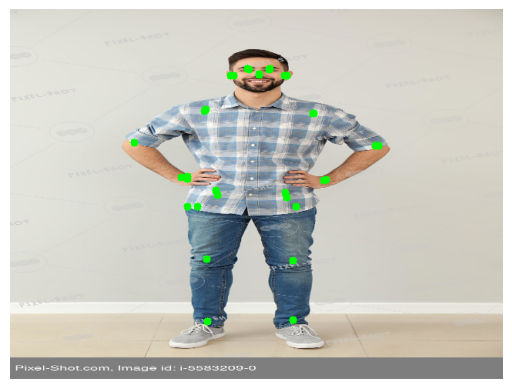

In [8]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torchvision.models as models
import numpy as np

# Загрузка предобученной модели
model = models.detection.keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Функция для обработки изображения
# Функция для обработки изображения
def process_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (640, 480))
    image_tensor = transforms.ToTensor()(image).unsqueeze(0)
    return image, image_tensor

# Функция для визуализации ключевых точек
def visualize_keypoints(image, keypoints):
    for i in range(keypoints.shape[0]):  # Проходим по всем найденным людям
        keypoints_person = keypoints[i]
        for j in range(len(keypoints_person)):  # Проходим по всем ключевым точкам
            x, y, v = keypoints_person[j]
            if v > 0:  # Если видимая точка
                cv2.circle(image, (int(x), int(y)), 5, (0, 255, 0), -1)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Основная функция
def main(image_path):
    image, image_tensor = process_image(image_path)

    with torch.no_grad():
        predictions = model(image_tensor)

    # Получаем ключевые точки
    keypoints = predictions[0]['keypoints'].cpu().numpy()

    # Визуализация ключевых точек
    visualize_keypoints(image, keypoints)


# Запуск
if __name__ == "__main__":
    main('/content/i-5583209-0.jpg')  # Укажите путь к вашему изображению
